# **Data in Design**

## Introduction to Computation for Design (Computationa design)  
* link: https://namjulee.github.io/data-in-design/
* keyword: Design Science, AI ML Data-Driven, Agent-based, Parametric, Generative, Algorithmic Design  
* This course is designed for designers who aim to use data as design materials. Throughout the coursework, students will explore the foundational concepts of design data, such as vectors and rasters, across various scales—from urban and architectural levels to product design. The course emphasizes the integration of computational thinking into the design process, positioning it as a core methodology for utilizing data as a creative resource. Software and code are introduced as essential tools for this approach.

-----

#### Instructor : NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - https://namjulee.github.io/njs-lab-public/

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

##### Installation - https://namjulee.github.io/njs-lab-public/installation

--- 
# Vector & Reference

* slider - https://docs.google.com/presentation/d/1GleNkuu6Uuif7y8EXv9ArdqGaEJs9s-5cK8O9SN3AeI/edit#slide=id.g2a49b8a7a81_0_9  

* slider-web
  * NJSLab - https://namjulee.github.io/njs-lab-public/lab/lab-vector-&-point-discrete-design-data/vector
  * tistory - https://computationaldesign.tistory.com/39  

* git  
  * https://github.com/NamjuLee/NJS/blob/master/NVector.cs   
  * https://github.com/NamjuLee/NJS/blob/master/NVector.py   

* Rhino Python Playlist - https://www.youtube.com/playlist?list=PLweNVwGgDKEYVSpbRQuzG4zHLpnfd4sUU

In [1]:
# https://plotly.com/python-api-reference/
import plotly.graph_objects as go
def rendering3D(pts, line=False):
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=[p[0] for p in pts], 
        y=[p[1] for p in pts], 
        z=[p[2] for p in pts], 
        mode='lines+markers' if line else 'markers',
        name='Vector',
        marker=dict(color='blue', size=3),
        line=dict(color='red', width=2),
        showlegend=False 
    ))
    fig.update_layout(
        scene=dict(
            camera=dict(
                eye=dict(x=1.5, y=-1.5, z=1.5), 
                center=dict(x=0, y=0, z=0),
                up=dict(x=0, y=0, z=1)
            )
        )
    )
    fig.show()

import matplotlib.pyplot as plt
def rendering2D(pts, line=False):
    plt.scatter([p[0] for p in pts], [p[1] for p in pts], c='r', marker='o')
    plt.xlabel('X Label')
    plt.ylabel('Y Label')
    plt.title('2D Point Cloud')
    plt.axis('equal')
    plt.show()


## Testing Renders

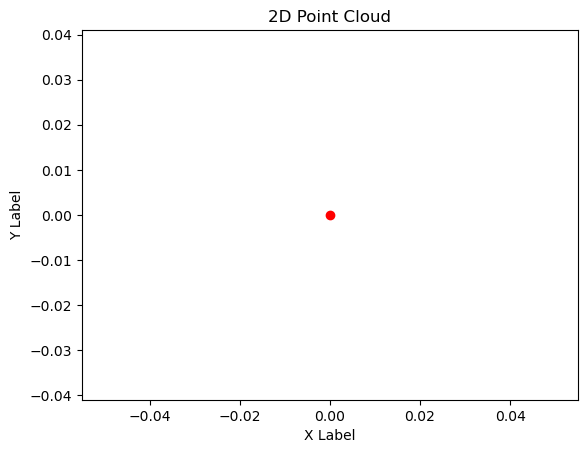

In [2]:
p = [0, 0, 0]

pts = [p]

rendering2D(pts)
rendering3D(pts)

In [3]:
points = [
    [0, 0, 0], 
    [1, 2, 3], 
    [2, 3, 4],
    [3, 1, 2]
]

rendering3D(points, line=True)

In [28]:
import plotly.graph_objects as go

def visualize_vectors(vectors):
    fig = go.Figure()
    
    colors = ['blue', 'green', 'purple', 'orange', 'cyan']
    
    for i, vec in enumerate(vectors):
        color = colors[i % len(colors)]
        
        fig.add_trace(go.Scatter3d(
            x=[0, vec[0]], y=[0, vec[1]], z=[0, vec[2]],
            mode='lines', line=dict(color=color, width=4),
            name=f'Vector {i+1}'
        ))
        
        fig.add_trace(go.Cone(
            x=[vec[0]], y=[vec[1]], z=[vec[2]],
            u=[vec[0]], v=[vec[1]], w=[vec[2]],
            colorscale=[[0, color], [1, color]],
            sizemode='absolute', sizeref=0.5,
            showscale=False, anchor="tail"
        ))
    
    max_val = max([max(abs(v[0]), abs(v[1]), abs(v[2])) for v in vectors])
    axis_length = max_val * 1.5
    
    fig.add_trace(go.Scatter3d(
        x=[0, axis_length], y=[0, 0], z=[0, 0],
        mode='lines', line=dict(color='red', width=2), name='X-axis'
    ))
    
    fig.add_trace(go.Scatter3d(
        x=[0, 0], y=[0, axis_length], z=[0, 0],
        mode='lines', line=dict(color='green', width=2), name='Y-axis'
    ))
    
    fig.add_trace(go.Scatter3d(
        x=[0, 0], y=[0, 0], z=[0, axis_length],
        mode='lines', line=dict(color='blue', width=2), name='Z-axis'
    ))
    
    fig.update_layout(
        scene=dict(
            xaxis=dict(range=[-axis_length, axis_length]),
            yaxis=dict(range=[-axis_length, axis_length]),
            zaxis=dict(range=[-axis_length, axis_length]),
            aspectmode='cube',
            camera=dict(
                eye=dict(x=1.5, y=-1.5, z=1.5),
                center=dict(x=0, y=0, z=0),
                up=dict(x=0, y=0, z=1),
                projection=dict(type="orthographic")
            )
        ),
        showlegend=True
    )
    
    fig.show()

vectors = [
    [1, 1, 0],
    [0, 1, 2],
    [-1, -1, 1]
]

visualize_vectors(vectors)

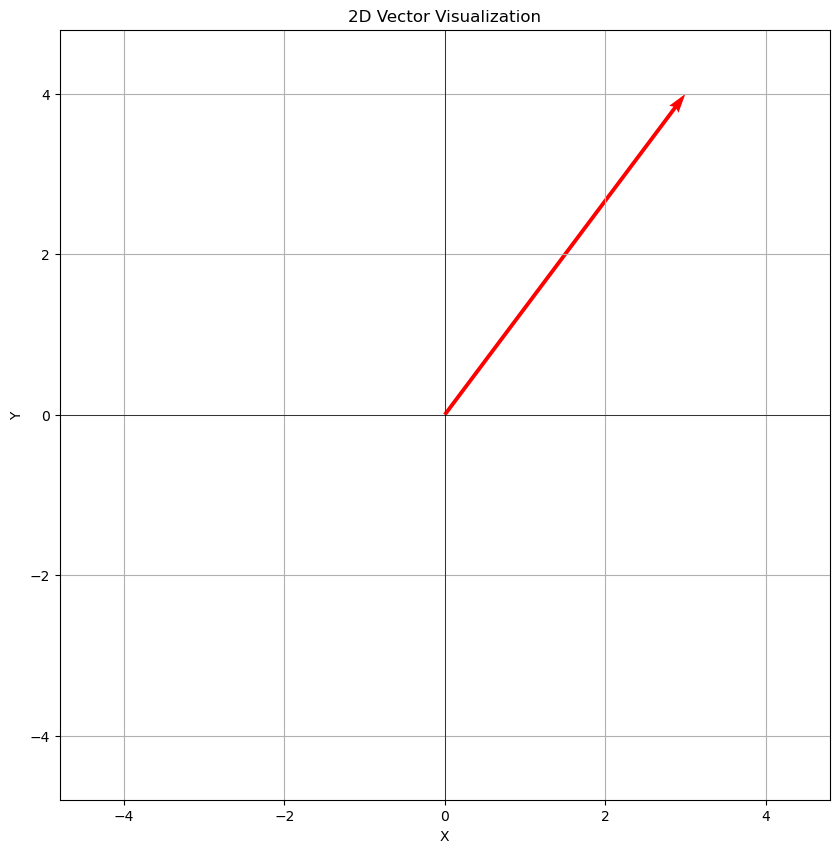

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_vector_2d(vector):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    origin = np.zeros(2)
    
    ax.quiver(origin[0], origin[1], 
              vector[0], vector[1],
              angles='xy', scale_units='xy', scale=1,
              color='r', width=0.005)
    
    max_range = np.array([vector[0], vector[1]]).max() * 1.2
    ax.set_xlim([-max_range, max_range])
    ax.set_ylim([-max_range, max_range])
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid(True)
    
    ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    
    plt.title('2D Vector Visualization')
    ax.set_aspect('equal')
    
    plt.ion()
    plt.connect('scroll_event', lambda event: plt.gcf().canvas.toolbar.zoom())
    plt.show()

# 사용 예시
vector = np.array([3, 4])
visualize_vector_2d(vector)

In [33]:
import plotly.graph_objects as go
import numpy as np

def plot_3d_vector(vector, color='red'):
    x = [0, vector[0]]
    y = [0, vector[1]]
    z = [0, vector[2]]
    
    vector_length = np.sqrt(vector[0]**2 + vector[1]**2 + vector[2]**2)
    direction = vector / vector_length
    
    arrow_length = vector_length * 0.2
    arrow_radius = vector_length * 0.08
    
    max_range = max(abs(np.array(vector))) * 1.5
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter3d(
        x=x, y=y, z=z,
        line=dict(color=color, width=6),
        marker=dict(size=0),
        name=f'Vector ({vector[0]}, {vector[1]}, {vector[2]})'
    ))
    
    fig.add_trace(go.Cone(
        x=[vector[0] - direction[0]*arrow_length/2],
        y=[vector[1] - direction[1]*arrow_length/2],
        z=[vector[2] - direction[2]*arrow_length/2],
        u=[direction[0]*arrow_length],
        v=[direction[1]*arrow_length],
        w=[direction[2]*arrow_length],
        sizeref=arrow_radius,
        colorscale=[[0, color], [1, color]],
        showscale=False
    ))
    
    fig.update_layout(
        scene = dict(
            xaxis = dict(range=[-max_range, max_range]),
            yaxis = dict(range=[-max_range, max_range]),
            zaxis = dict(range=[-max_range, max_range]),
            aspectmode='cube',
            camera=dict(
                up=dict(x=0, y=0, z=1),
                center=dict(x=0, y=0, z=0),
                eye=dict(x=1.5, y=1.5, z=1.5)
            )
        ),
        title='3D Vector Visualization with Arrows',
        showlegend=True,
        width=800,
        height=800
    )
    
    fig.add_trace(go.Scatter3d(
        x=[0], y=[0], z=[0],
        mode='markers',
        marker=dict(size=6, color='black'),
        name='Origin'
    ))
    
    return fig

def plot_multiple_vectors(vectors):
    fig = go.Figure()
    max_range = max(abs(np.array([v[0] for v in vectors]).flatten())) * 1.5
    
    for vector, color in vectors:
        x = [0, vector[0]]
        y = [0, vector[1]]
        z = [0, vector[2]]
        
        vector_length = np.sqrt(vector[0]**2 + vector[1]**2 + vector[2]**2)
        direction = vector / vector_length
        
        arrow_length = vector_length * 0.2
        arrow_radius = vector_length * 0.08
        
        fig.add_trace(go.Scatter3d(
            x=x, y=y, z=z,
            line=dict(color=color, width=6),
            marker=dict(size=0),
            name=f'Vector ({vector[0]}, {vector[1]}, {vector[2]})'
        ))
        
        fig.add_trace(go.Cone(
            x=[vector[0] - direction[0]*arrow_length/2],
            y=[vector[1] - direction[1]*arrow_length/2],
            z=[vector[2] - direction[2]*arrow_length/2],
            u=[direction[0]*arrow_length],
            v=[direction[1]*arrow_length],
            w=[direction[2]*arrow_length],
            sizeref=arrow_radius,
            colorscale=[[0, color], [1, color]],
            showscale=False
        ))
    
    fig.update_layout(
        scene = dict(
            xaxis = dict(range=[-max_range, max_range]),
            yaxis = dict(range=[-max_range, max_range]),
            zaxis = dict(range=[-max_range, max_range]),
            aspectmode='cube'
        ),
        title='Multiple 3D Vectors Visualization with Arrows',
        width=800,
        height=800
    )
    
    fig.add_trace(go.Scatter3d(
        x=[0], y=[0], z=[0],
        mode='markers',
        marker=dict(size=6, color='black'),
        name='Origin'
    ))
    
    return fig

vectors = [
    (np.array([1, 0, 0]), 'red'),
    (np.array([0, 1, 0]), 'green'),
    (np.array([0, 0, 1]), 'blue'),
    (np.array([1, 1, 1]), 'black'),
]
fig = plot_multiple_vectors(vectors)
fig.show()

## Vector
Link: https://namjulee.github.io/Data-Design-AI-for-Urban-Data-and-Viz-Harvard-GSD-public/lab/vector%20&%20raster/vector%20and%20operation

<iframe
  src="https://computationaldesign.tistory.com/39"
  style="width:100%; height:800px; background:#fff; border:none"
></iframe>

# Vector Computation 

* Vector construction

* Vector arithmetic operations
  * Vector addition
  * Vector subtraction
  * Scalar Multiplication of a Vector / Division by a Scalar (Scalar Division of a Vector)
  * Dot product
  * Cross Product


In [ ]:
# TODO 

# Analytical Geometry

* Distance between two vectors

* Vector at t
* Point at a distance d along the line between two vectors
* Linear(non-linear) interpolation between two vectors

* Angle Between Vectors
* Angle of Triangle 
* Area of Triangle
* Triangle Unit normal

* Projection of point to line
* Projection of Point to plane

* Center of triangle 
* Center of point cloud

In [ ]:
# TODO 

# Vector workshop 

* Rhino - GH, Python, C#
* Unity - C#
* Web Canvas - Javascirpt(Typescript) 

## Additional Reading and Resources
* Rhino Grasshopper Python Challenge - https://computationaldesign.tistory.com/25
* python documentation(3.x) - https://docs.python.org/3/
* codecademy - https://www.codecademy.com/learn/learn-python-3
* Think Python - https://www.greenteapress.com/thinkpython/thinkpython.pdf